In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Question 1D

In [30]:
def pred(z, t, a, b, c, e, f):
   x , y = z
   dxdt = a * x - b * x**2 - c * x * y
   dydt = e * x * y - f * y
   return [dxdt, dydt]


In [37]:
# Parameters
a = 2
b = 0.2
c = 0.04
e = 0.2
f = 1

x0 = 10
y0 = 5
z0 = [x0, y0]

t = np.linspace(0, 200, 1000)

sol = odeint(pred, z0, t, args = (a,b,c,e,f))
x , y = sol.T


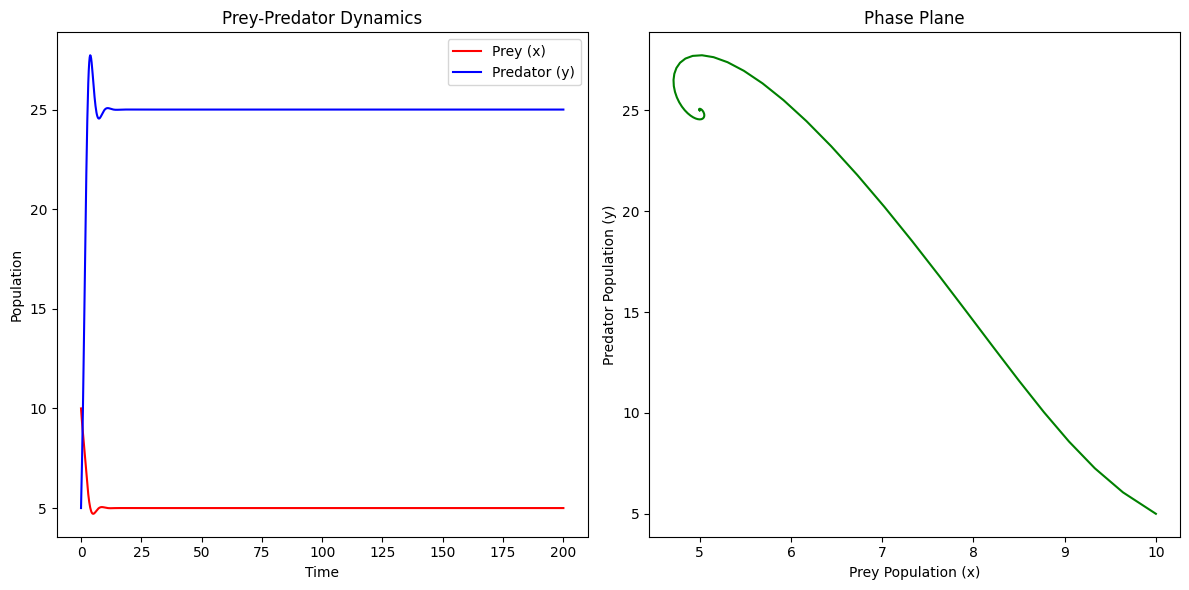

In [38]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(t, x, label="Prey (x)", color="red")
plt.plot(t, y, label="Predator (y)", color="blue")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Prey-Predator Dynamics")

# Phase plane plot
plt.subplot(1, 2, 2)
plt.plot(x, y, color="green")
plt.xlabel("Prey Population (x)")
plt.ylabel("Predator Population (y)")
plt.title("Phase Plane")
plt.tight_layout()
plt.show()

# Question 2D

In [ ]:

def pred_logistic(t, z, a, b, c, e, f, g):
   x, y = z
   dxdt = a * x - b * x**2 - c * x * y
   dydt = e * x * y + f * y - g * y**2
   return [dxdt, dydt]

def pred_sim(a, b, c, e, f, g, x0, y0, t_span, t_eval):
   z0 = [x0, y0]
   sol = solve_ivp(
       pred_logistic, t_span, z0, args=(a, b, c, e, f, g), t_eval=t_eval, method='RK45'
   )
   return sol

In [39]:
a = 3
b = 0.3
c = 0.06 
e = 0.3
f = 1.5
g = 0.03

x0 = 10
y0 = 5
span_t = (0,200)
eval_t = np.linspace(span_t[0], span_t[1], 1000)


solution = pred_sim(a, b , c, e, f, g, x0, y0, span_t, eval_t)

In [41]:
def phase_plane(sol, title):
   plt.figure(figsize=(8, 6))
   plt.plot(sol.y[0], sol.y[1], label="Trajectory")
   plt.xlabel("Prey Population (x)")
   plt.ylabel("Predator Population (y)")
   plt.title(title)
   plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
   plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
   plt.grid()
   plt.legend()
   plt.show()
   
def population_over_time(sol, t_eval, title):
   plt.figure(figsize=(8, 6))
   plt.plot(t_eval, sol.y[0], label="Prey Population (x)")
   plt.plot(t_eval, sol.y[1], label="Predator Population (y)")
   plt.xlabel("Time")
   plt.ylabel("Population")
   plt.title(title)
   plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
   plt.grid()
   plt.legend()
   plt.show()


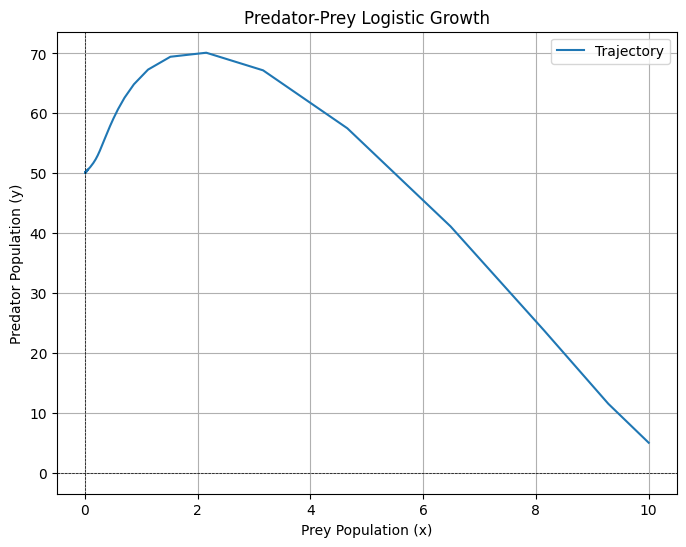

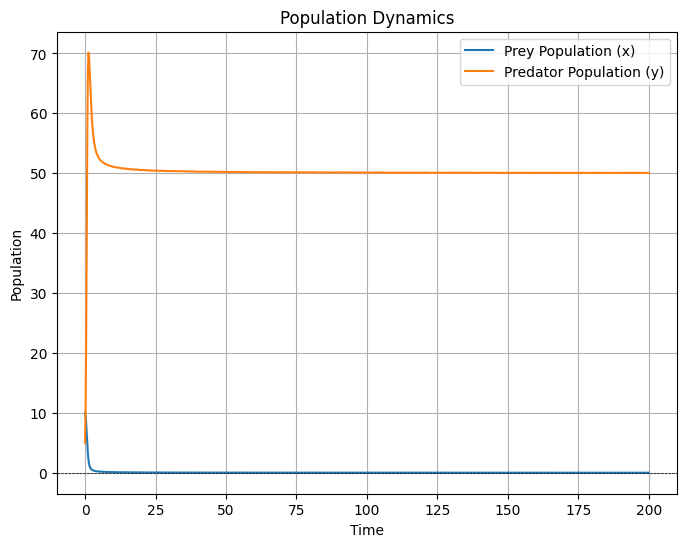

In [42]:
phase_plane(solution, "Predator-Prey Logistic Growth")
population_over_time(solution, eval_t, "Population Dynamics")